# KMeans Clustering on Iris Dataset using only Petal length and Petal width

In [1]:
#Importing libraries

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

# Exploratory Data Analysis

In [2]:
# Load Iris Dataset

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Reading dataset

dfi = pd.DataFrame(data = iris.data, columns = iris.feature_names)
dfi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#In this dataset, we are going to be working with Petal length and Petal with
# Dropping non-relevant columns

dfi.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
dfi.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
# Renaming columns 

dfi['pl'] = dfi['petal length (cm)']
dfi['pw'] = dfi['petal width (cm)']
dfi.drop(['petal length (cm)', 'petal width (cm)'], axis ='columns', inplace=True)
dfi.head()

,pl,pw
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


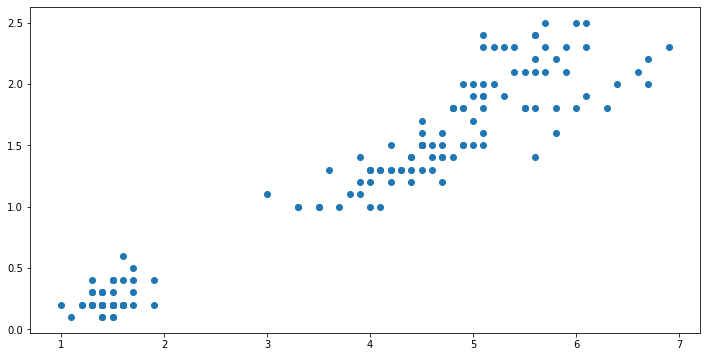

In [6]:
# Plotting the data

plt.figure(figsize=(12, 6))
plt.scatter(dfi.pl, dfi.pw)

In [7]:
kn = KMeans(n_clusters = 3)
kn

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# Predicting clusters for each flower

y_pred = kn.fit_predict(dfi[['pl', 'pw']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# Adding cluster info to dataset

dfi['cluster'] = y_pred 
dfi.head()

,pl,pw,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


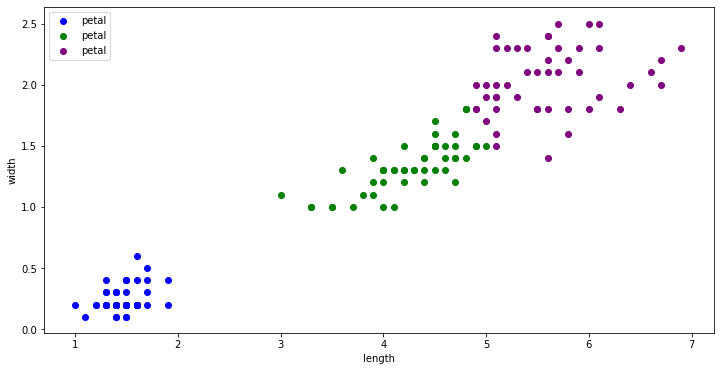

In [10]:
# Plotting data based on their cluster

df1 = dfi[dfi.cluster == 0]
df2 = dfi[dfi.cluster == 1]
df3 = dfi[dfi.cluster == 2]

plt.figure(figsize=(12, 6))
plt.scatter(df1.pl, df1.pw, color='b', label='petal')
plt.scatter(df2.pl, df2.pw, color='g', label='petal')
plt.scatter(df3.pl, df3.pw, color='purple', label='petal')

plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()

In [11]:
# Standardize the data - Feature Scaling

scaler = MinMaxScaler()
scaler.fit(dfi[['pl']])
dfi['pl'] = scaler.transform(dfi[['pl']])

scaler.fit(dfi[['pw']])
dfi['pw'] = scaler.transform(dfi[['pw']])
dfi.head()

,pl,pw,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [12]:
# Obtaining new clusters if any

kn = KMeans(n_clusters = 3)
y_predict = kn.fit_predict(dfi[['pl', 'pw']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# Updating cluster

dfi['cluster'] = y_predict
dfi.head()

,pl,pw,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


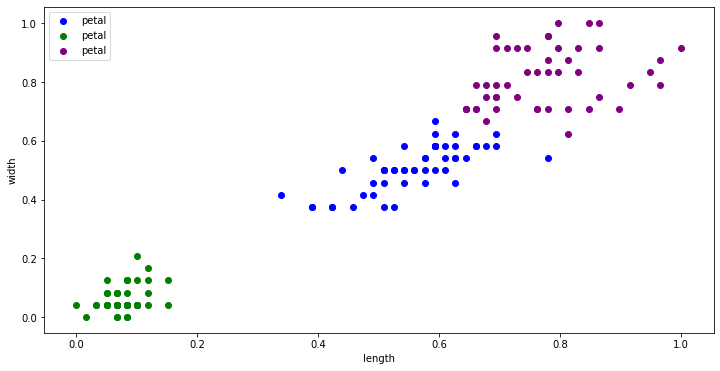

In [14]:
# Updated Cluster plotting

df1 = dfi[dfi.cluster == 0]
df2 = dfi[dfi.cluster == 1]
df3 = dfi[dfi.cluster == 2]

plt.figure(figsize=(12, 6))
plt.scatter(df1.pl, df1.pw, color='b', label='petal')
plt.scatter(df2.pl, df2.pw, color='g', label='petal')
plt.scatter(df3.pl, df3.pw, color='purple', label='petal')

plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()

In [15]:
# Getting centriods for each cluster

kn.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

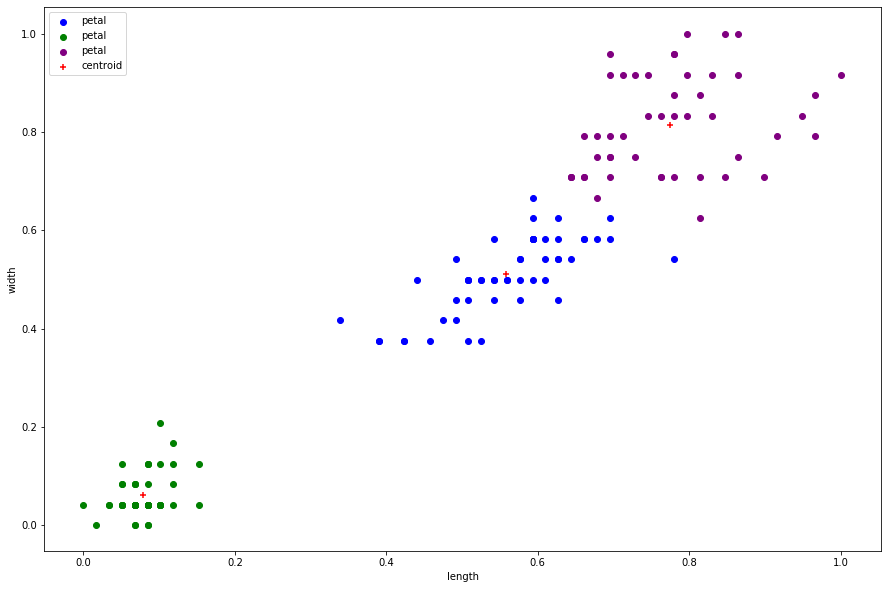

In [16]:
# Centroids in their cluster

df1 = dfi[dfi.cluster == 0]
df2 = dfi[dfi.cluster == 1]
df3 = dfi[dfi.cluster == 2]

plt.figure(figsize=(15, 10))
plt.scatter(df1.pl, df1.pw, color='b', label='petal')
plt.scatter(df2.pl, df2.pw, color='g', label='petal')
plt.scatter(df3.pl, df3.pw, color='purple', label='petal')
plt.scatter(kn.cluster_centers_[:,0], kn.cluster_centers_[:,1], color='red', marker='+', label='centroid')

plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()


In [17]:
# Fitting the range to find optimal k value

k_rng = range(1, 10)
sse = []
for k in k_rng:
    kn = KMeans(n_clusters = k)
    kn.fit(dfi[['pl', 'pw']])
    sse.append(kn.inertia_)

In [18]:
# Sum of Squared Errors

sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.853861735391224,
 0.6800800986587507,
 0.5651273455703979,
 0.48580845539143697,
 0.4178714129819896]

Text(0, 0.5, 'SSE')

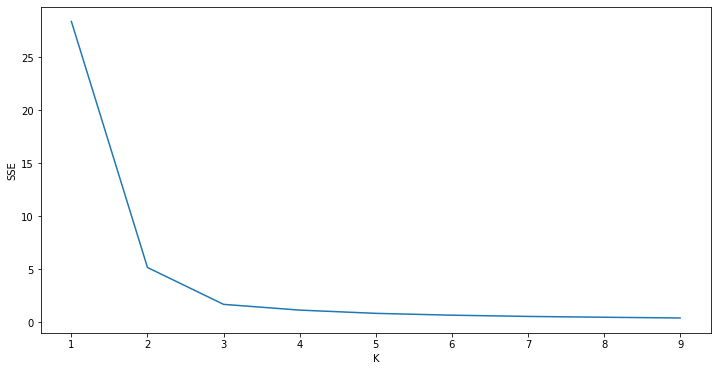

In [19]:
# Obtaining optimal k value using elbow technique

plt.figure(figsize=(12, 6))
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')